# Random Forrest

In [54]:
## Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os

In [55]:

## Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Feature Data
filename = "features.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)

data = pd.read_csv(filepath,index_col=False, header=0)
print(len(data))
data.head()

339


,Solar,Energy,year,Price,REDTI,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,2.965,2018.869,1990,7.17,8.8,1,0,0,0,0,0,0,0,0,0,0,0
1,3.196,1640.310,1990,7.48,22.7,0,1,0,0,0,0,0,0,0,0,0,0
2,4.403,1559.289,1990,7.57,29.8,0,0,1,0,0,0,0,0,0,0,0,0
3,4.853,1299.971,1990,7.69,26.8,0,0,0,1,0,0,0,0,0,0,0,0
4,5.357,1143.417,1990,7.96,53.9,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
def lag_data(lag_count, df):
    features = []
    targets = []
    for i in range(1, lag_count+1):
        df['lag%s' % i] = df.Solar.shift(i)
        df['peek%s' % i] = df.Solar.shift(-1*i)
        features.append('lag%s' % i)
        targets.append('peek%s' % i)
        
    #differencing
    df['diff1'] = df.Solar.diff(1)
    return features, targets, df.iloc[lag_count:-1*lag_count] #dropped rows with nan
    
lag_count = 12
features, targets, data = lag_data(lag_count, data)

print(len(data))

315


In [57]:
print(features, targets)

['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'lag6', 'lag7', 'lag8', 'lag9', 'lag10', 'lag11', 'lag12'] ['peek1', 'peek2', 'peek3', 'peek4', 'peek5', 'peek6', 'peek7', 'peek8', 'peek9', 'peek10', 'peek11', 'peek12']


## Improve model by adding features

In [58]:
features.append("Price")
features.append("Solar")


In [59]:
#targets.append("Solar")
#print(features, targets)

In [60]:
X = data[features]
print(X.shape)
X.head()

(315, 14)


,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,Price,Solar
12,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,3.196,2.965,7.41,3.058
13,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,3.196,7.61,3.296
14,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,4.403,7.79,4.542
15,4.542,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,4.853,7.98,5.006
16,5.006,4.542,3.296,3.058,3.635,3.829,4.668,5.122,5.616,5.675,5.406,5.357,8.14,5.526


In [61]:
y = data[targets]
print(y.head())
row = [(y.iloc[303])[0]]
print(y.shape)
row


    peek1  peek2  peek3  peek4  peek5  peek6  peek7  peek8  peek9  peek10  \
12  3.296  4.542  5.006  5.526  5.576  5.853  5.793  5.283  4.815   3.950   
13  4.542  5.006  5.526  5.576  5.853  5.793  5.283  4.815  3.950   3.749   
14  5.006  5.526  5.576  5.853  5.793  5.283  4.815  3.950  3.749   3.168   
15  5.526  5.576  5.853  5.793  5.283  4.815  3.950  3.749  3.168   3.415   
16  5.576  5.853  5.793  5.283  4.815  3.950  3.749  3.168  3.415   4.705   

    peek11  peek12  
12   3.749   3.168  
13   3.168   3.415  
14   3.415   4.705  
15   4.705   5.185  
16   5.185   5.724  
(315, 12)


[15.97]

In [62]:
data[features].shape

(315, 14)

In [63]:
data[targets].shape

(315, 12)

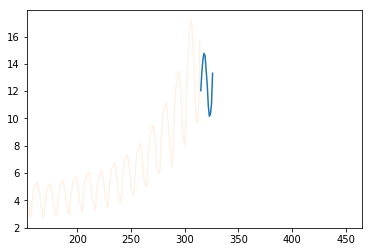

In [64]:
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
window = len(data) -  lag_count
rf.fit(data[features].values[:window], data[targets].values[:window])

plt.plot(
    range(window+lag_count,window+2*lag_count), 
    rf.predict([data[features].iloc[window]])[0]
)
plt.xlim(window-150,window+lag_count+150) #zoomed in so you can see prediction. comment-out this line if you want.
plt.plot(data.Solar.values,alpha=.1)
plt.show()


In [65]:

rf.score(data[features].values[window:], data[targets].values[window:])

0.004145913433394678

In [66]:
#from sklearn.metrics import mean_squared_error

#predictions = rf.predict([data[features].values[window:]])
# MSE = mean_squared_error(data[targets].values[window:], predictions)
# r2 = rf.score(data[features].values[window:], data[targets].values[window:])

# print(f"MSE: {MSE}, R2: {r2}")

## Backpropagation model

<IPython.core.display.Javascript object>


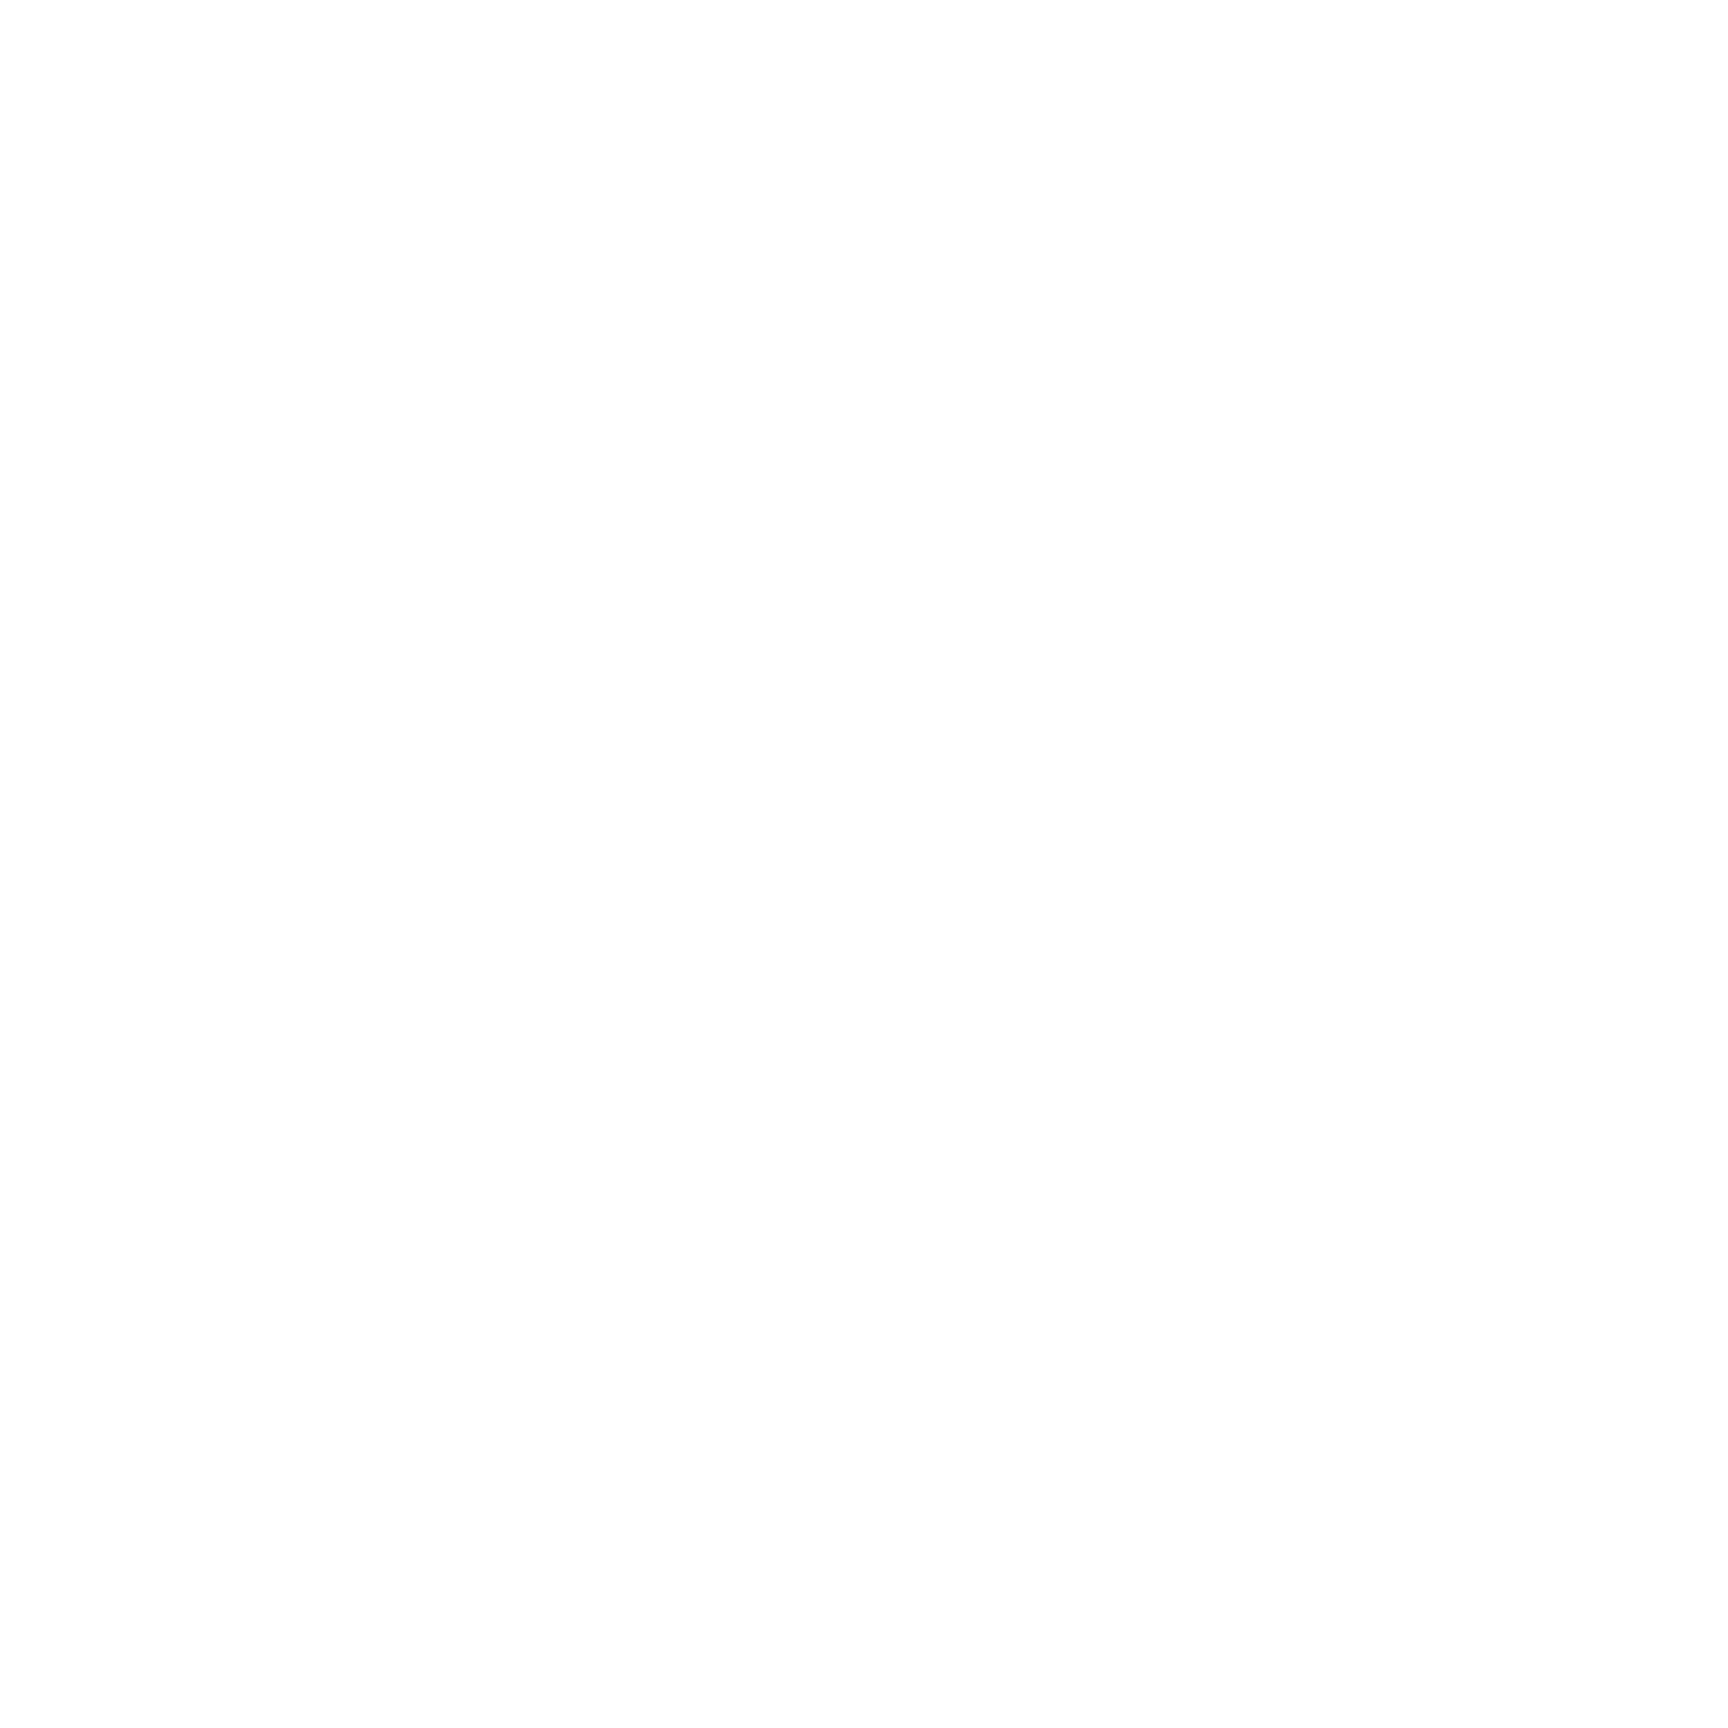

IndexError: single positional indexer is out-of-bounds

In [71]:
#this one looks backward at several previous days (lag_count) and makes a prediction 
#of several future days' returns (again, lag_count)
#I did not transform any of the data, and it still works reasonably well.
#be careful not to "predict" days that you've already "peeked" at.

#orange is actual bitcount price, blue is the predictor.
#I did not bother to predict more than "lag_count" days ahead, that is something you can do on your own.


%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

trainsize=303
from sklearn.svm import SVR

def pltsin(ax, colors=['b'], trainsize=303):
    rf = RandomForestRegressor()

    rf.fit(data[features].values[:trainsize], data[targets].values[:trainsize])

    ax.plot(
        range(trainsize+lag_count,trainsize+2*lag_count), 
        rf.predict([data[features].iloc[trainsize+lag_count]])[0]
    )
    ax.plot(data.Solar.values, alpha=.3)
    ax.plot(range(trainsize), [-100]*trainsize)
    fig.canvas.draw()
    
fig,ax = plt.subplots(1,1)
fig.set_size_inches(12, 12, forward=True)
ax.set_xlabel('X')
ax.set_ylabel('Y')

for f in range(100):
    if trainsize>=len(data):
        break
    ax.clear()
    pltsin(ax, ['b', 'r'], trainsize)
    time.sleep(.1)
    trainsize+=lag_count
    
    

## Traditional Dataset split into X and y. Model not working

* X

* y

In [27]:
filename = "X.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
X = pd.read_csv(filepath,index_col=False, header=0)
filename = "y.csv"
output_data = "../../data/output" 
filepath = os.path.join(output_data,filename)
y = pd.read_csv(filepath,index_col=False, names=["Value"])


In [28]:
X.head()

,year,Price,lag1,peek1,lag2,peek2,lag3,peek3,lag4,peek4,...,lag8,peek8,lag9,peek9,lag10,peek10,lag11,peek11,lag12,peek12
0,1991,7.41,3.635,3.296,3.829,4.542,4.668,5.006,5.122,5.526,...,5.357,5.283,4.853,4.815,4.403,3.950,3.196,3.749,2.965,3.168
1,1991,7.61,3.058,4.542,3.635,5.006,3.829,5.526,4.668,5.576,...,5.406,4.815,5.357,3.950,4.853,3.749,4.403,3.168,3.196,3.415
2,1991,7.79,3.296,5.006,3.058,5.526,3.635,5.576,3.829,5.853,...,5.675,3.950,5.406,3.749,5.357,3.168,4.853,3.415,4.403,4.705
3,1991,7.98,4.542,5.526,3.296,5.576,3.058,5.853,3.635,5.793,...,5.616,3.749,5.675,3.168,5.406,3.415,5.357,4.705,4.853,5.185
4,1991,8.14,5.006,5.576,4.542,5.853,3.296,5.793,3.058,5.283,...,5.122,3.168,5.616,3.415,5.675,4.705,5.406,5.185,5.357,5.724


In [29]:
Xt = X.T
Xt.head()

,0,1,2,3,4,5,6,7,8,9,...,305,306,307,308,309,310,311,312,313,314
year,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,1991.000,...,2016.000,2016.000,2016.000,2016.000,2016.000,2016.000,2016.000,2017.000,2017.000,2017.000
Price,7.410,7.610,7.790,7.980,8.140,8.320,8.380,8.410,8.370,8.320,...,12.730,12.680,12.880,12.870,12.460,12.750,12.230,12.210,12.780,12.890
lag1,3.635,3.058,3.296,4.542,5.006,5.526,5.576,5.853,5.793,5.283,...,15.970,16.513,17.191,16.687,14.864,13.291,10.851,9.879,9.655,10.808
peek1,3.296,4.542,5.006,5.526,5.576,5.853,5.793,5.283,4.815,3.950,...,17.191,16.687,14.864,13.291,10.851,9.879,9.655,10.808,15.735,17.576
lag2,3.829,3.635,3.058,3.296,4.542,5.006,5.526,5.576,5.853,5.793,...,14.404,15.970,16.513,17.191,16.687,14.864,13.291,10.851,9.879,9.655


In [30]:
y.head()

,Value
0,3.058
1,3.296
2,4.542
3,5.006
4,5.526


In [31]:
y = y.values.reshape(-1, 1)
print(Xt.shape, y.shape)

(26, 315) (315, 1)


## Split dataset into Train and Test

Given the dataset is a time series, we will leave the last 12 months as test data.

In [32]:
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train, X_test = X[1:len(X)-12], X[len(X)-12:]
y_train, y_test = y[1:len(X)-12], y[len(X)-12:]



## Scale the data and plot the difference

In [33]:
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

print("X_train_scaled:", X_train_scaled.shape)
print("y_train_scaled:", y_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_test_scaled:", y_test_scaled.shape)

X_train_scaled: (302, 26)
y_train_scaled: (302, 1)
X_test_scaled: (12, 26)
y_test_scaled: (12, 1)


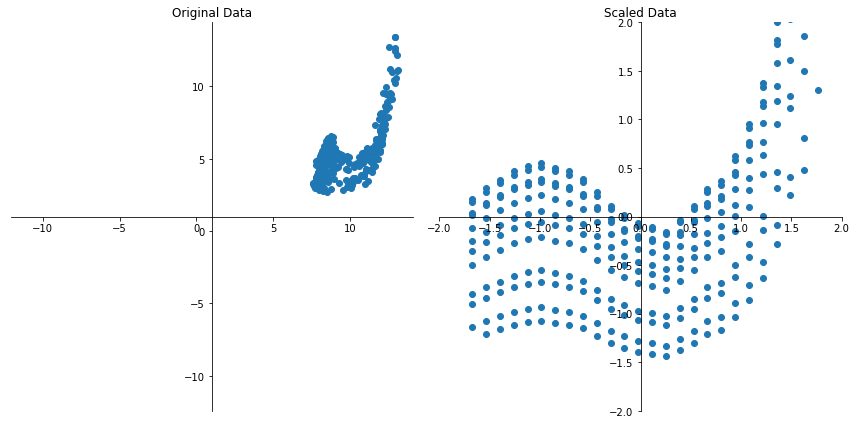

In [34]:
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Price"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Price"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
# Save our graph 
plt.tight_layout()
plt.savefig("../../images/LR_scaled_features.png")
plt.show()


## Create the Random Forrest model

Train the model and plot results

In [35]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
rf = RandomForestRegressor(max_depth=2,random_state=0)
y_train_ravel = np.ravel(y_train_scaled)
rf.fit(X_train_scaled, y_train_ravel)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

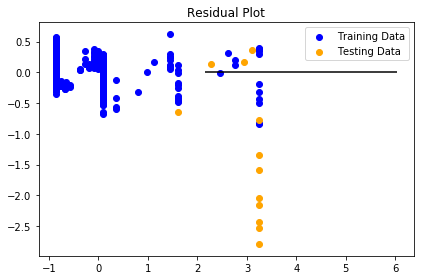

In [36]:
plt.scatter(rf.predict(X_train_scaled), rf.predict(X_train_scaled) - y_train_ravel, c="blue", label="Training Data")
y_test_ravel = np.ravel(y_test_scaled)
plt.scatter(rf.predict(X_test_scaled), rf.predict(X_test_scaled) - y_test_ravel, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.tight_layout()
plt.savefig("../../images/RF_residual.png")
plt.show()

## Evaluate the model

In [37]:
rf.score(X_test_scaled, y_test_scaled)


-0.4751449867734263

In [38]:
from sklearn.metrics import mean_squared_error

predictions = rf.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = rf.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 2.8698066164166254, R2: -0.4751449867734263
